# JupyterLite で学ぶ seaborn 中級チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
seaborn の中級レベルの機能を学ぶためのチュートリアルです。

## 対象者
- seaborn の基礎（基本プロット、スタイル設定）を理解している方
- より複雑な統計的可視化を学びたい方

## このチュートリアルで学ぶこと
1. FacetGrid の活用
2. PairGrid と JointGrid
3. ClusterMap（階層的クラスタリング）
4. 統計的推定の可視化
5. 時系列データの可視化
6. 高度なカスタマイズ
7. matplotlib との連携

## 0. 環境準備（JupyterLite 用）

まず、必要なライブラリをインストールします。

In [1]:
# JupyterLite 用のパッケージインストール
try:
    import piplite
    await piplite.install(['numpy', 'pandas', 'matplotlib', 'seaborn'])
except ImportError:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(f'seaborn バージョン: {sns.__version__}')

# デフォルトスタイル設定
sns.set_style('whitegrid')
sns.set_palette('husl')

# 日本語フォントの設定（JupyterLite環境用）
try:
    import japanize_matplotlib_jlite
except:
    pass

seaborn バージョン: 0.13.2


In [2]:
# サンプルデータの読み込み
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
diamonds = sns.load_dataset('diamonds')
flights = sns.load_dataset('flights')

print('データセット読み込み完了')

データセット読み込み完了


---
## 1. FacetGrid の活用

FacetGrid は、データのサブセットごとにグラフを作成するための強力なツールです。

### 1.1 基本的な FacetGrid

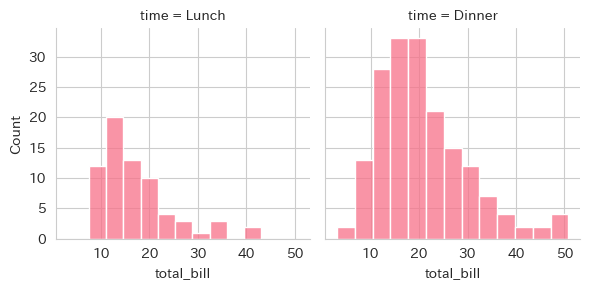

In [3]:
# 列方向にパネルを分割
g = sns.FacetGrid(tips, col='time')
g.map(sns.histplot, 'total_bill')
plt.show()

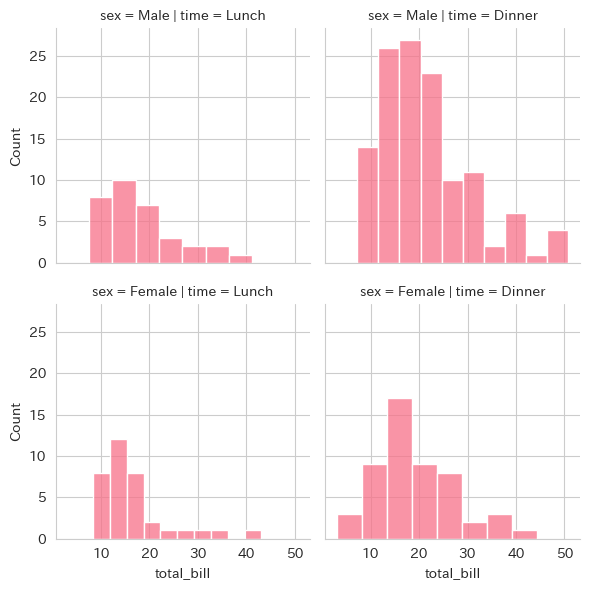

In [4]:
# 行と列でパネルを分割
g = sns.FacetGrid(tips, row='sex', col='time')
g.map(sns.histplot, 'total_bill')
plt.show()

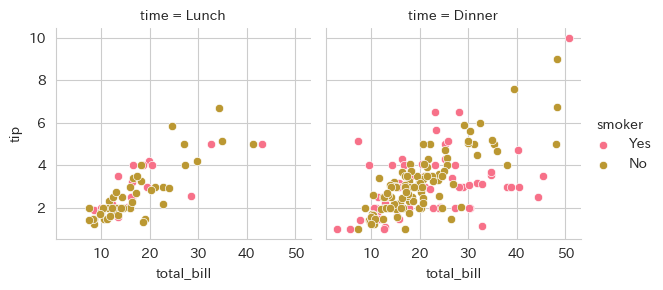

In [5]:
# hue で色分け
g = sns.FacetGrid(tips, col='time', hue='smoker')
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

### 1.2 FacetGrid のカスタマイズ

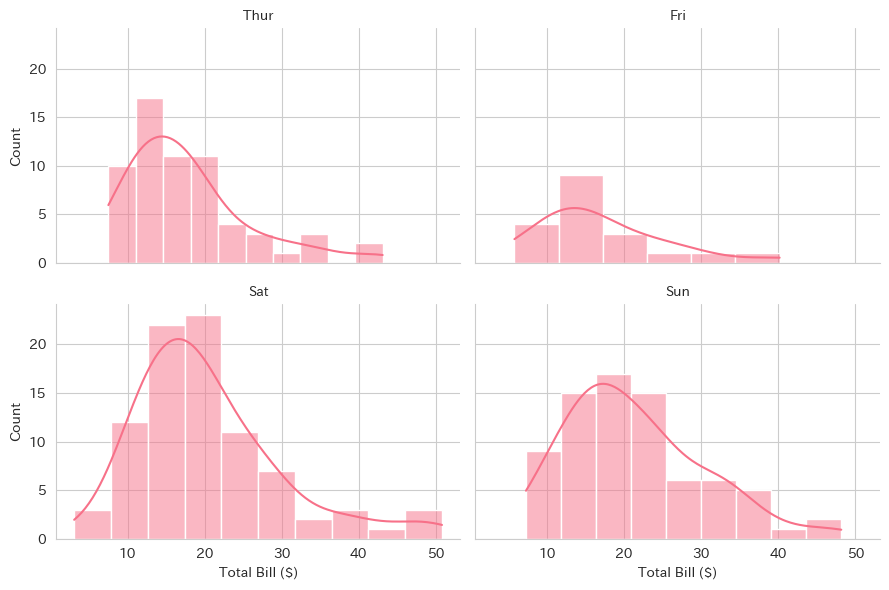

In [6]:
# サイズと縦横比
g = sns.FacetGrid(tips, col='day', col_wrap=2, height=3, aspect=1.5)
g.map(sns.histplot, 'total_bill', kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Total Bill ($)', 'Count')
plt.show()

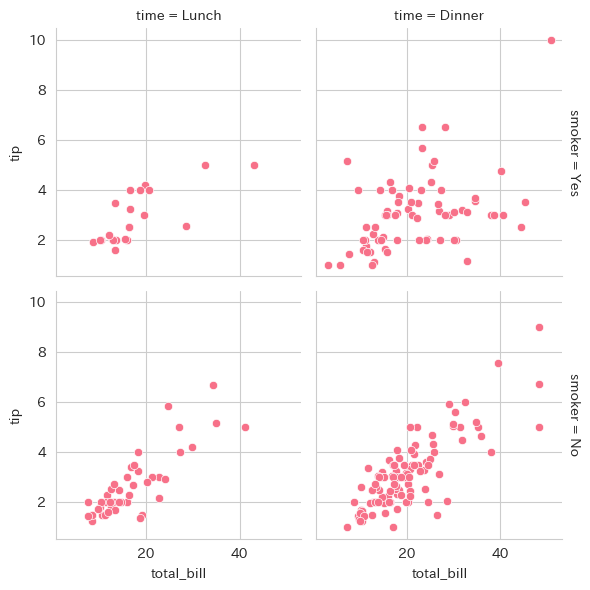

In [7]:
# 共通の軸範囲
g = sns.FacetGrid(tips, col='time', row='smoker', 
                  margin_titles=True, 
                  sharex=True, sharey=True)
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.show()

### 1.3 カスタム関数との組み合わせ

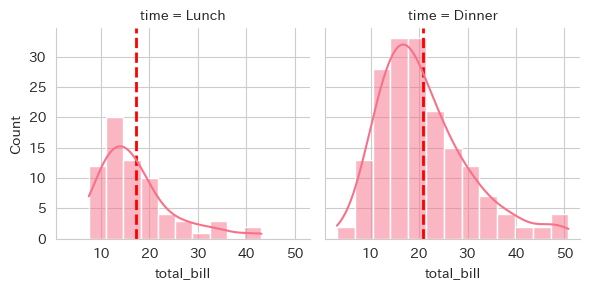

In [8]:
# カスタムプロット関数
def custom_hist(x, **kwargs):
    plt.axvline(x.mean(), color='red', linestyle='--', linewidth=2)
    sns.histplot(x, **kwargs)

g = sns.FacetGrid(tips, col='time')
g.map(custom_hist, 'total_bill', kde=True)
plt.show()

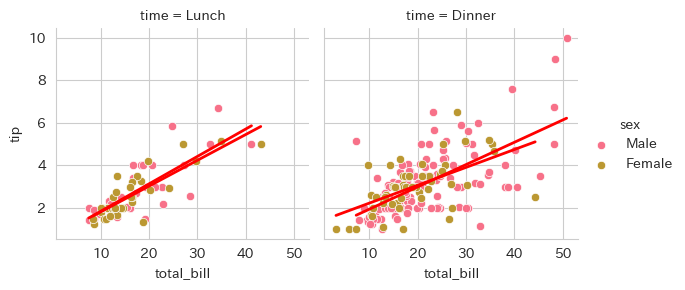

In [9]:
# map_dataframe を使った高度な操作
def scatter_with_reg(data, x, y, **kwargs):
    sns.scatterplot(data=data, x=x, y=y, **kwargs)
    # 回帰線を追加
    slope, intercept = np.polyfit(data[x], data[y], 1)
    x_range = np.linspace(data[x].min(), data[x].max(), 100)
    plt.plot(x_range, slope * x_range + intercept, color='red', linewidth=2)

g = sns.FacetGrid(tips, col='time', hue='sex')
g.map_dataframe(scatter_with_reg, x='total_bill', y='tip')
g.add_legend()
plt.show()

---
## 2. PairGrid と JointGrid

### 2.1 PairGrid

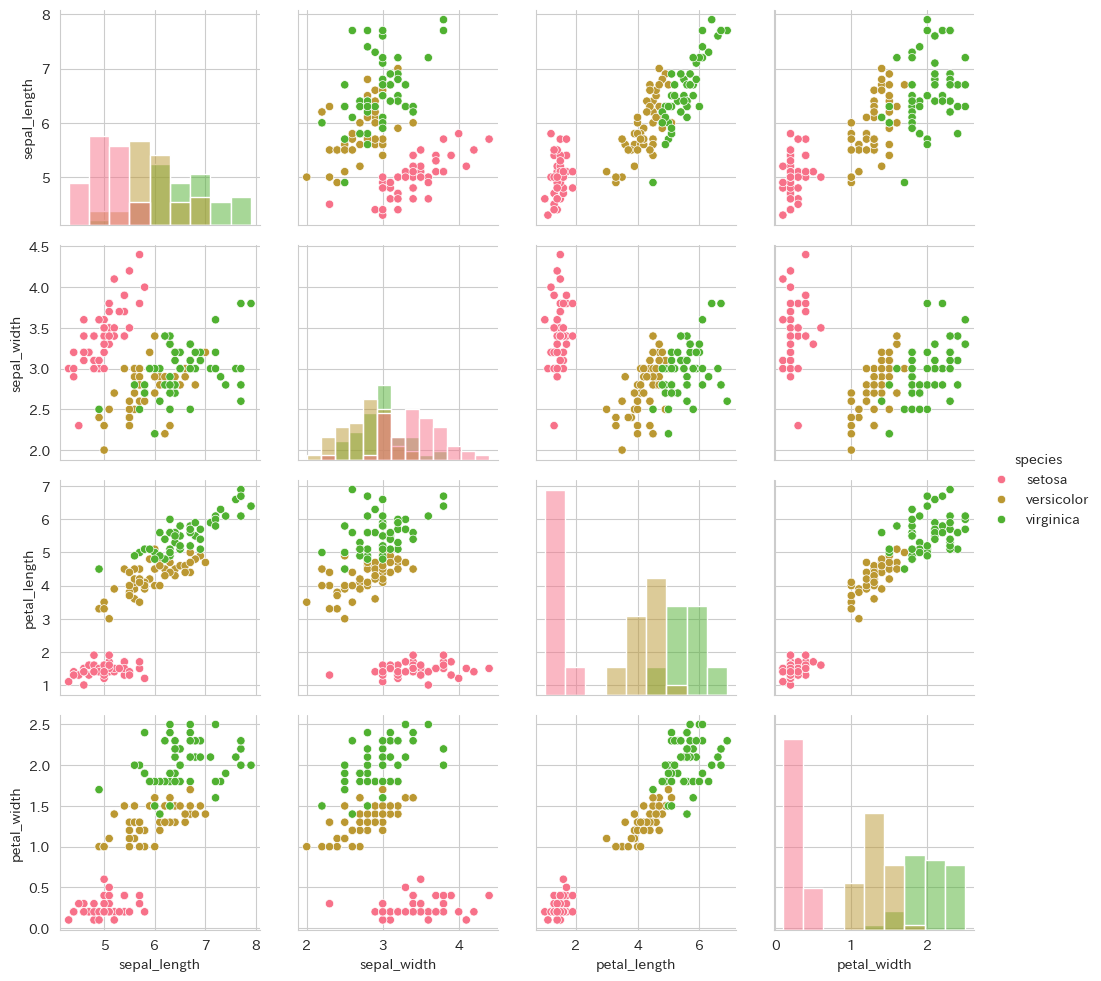

In [10]:
# 基本的な PairGrid
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.histplot)  # 対角線
g.map_offdiag(sns.scatterplot)  # 非対角線
g.add_legend()
plt.show()

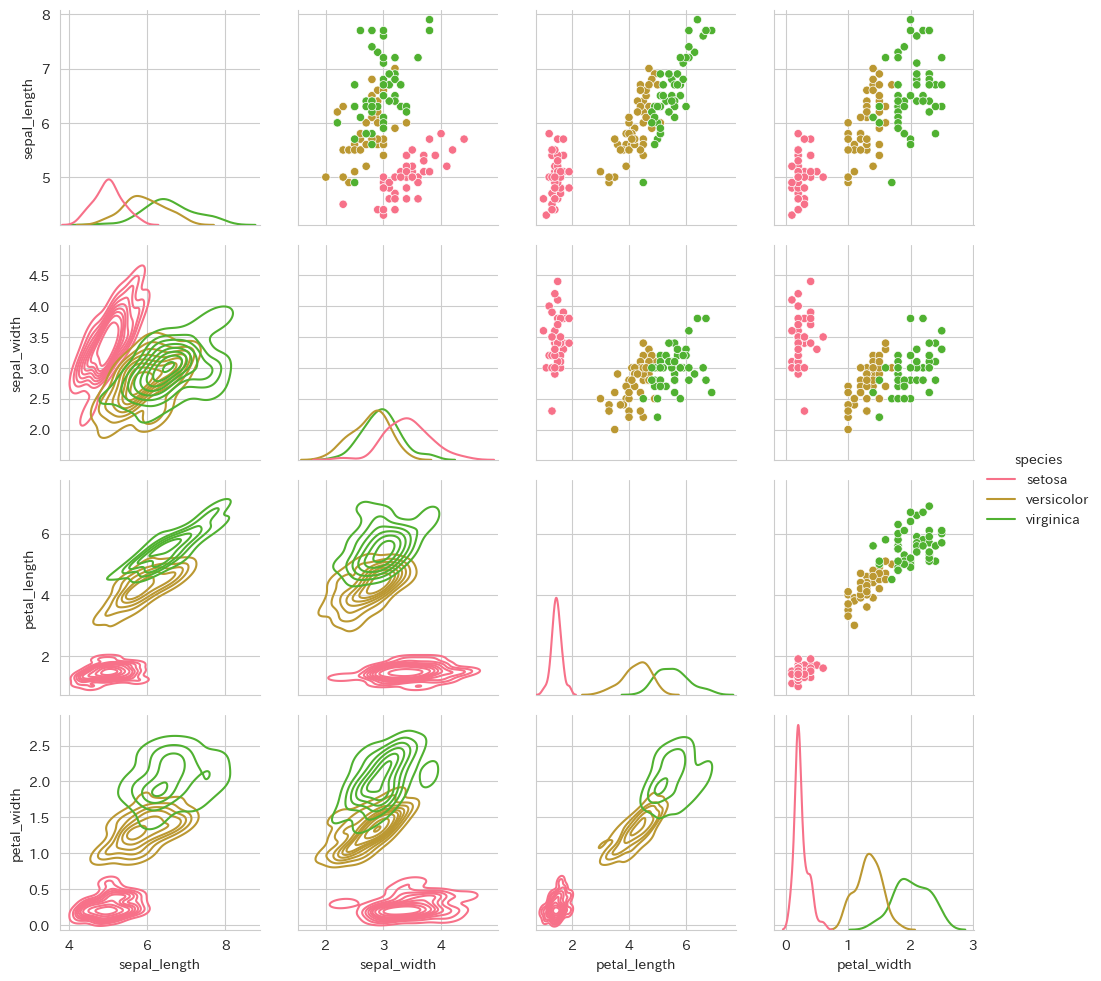

In [11]:
# 上三角と下三角を別のプロットに
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.show()

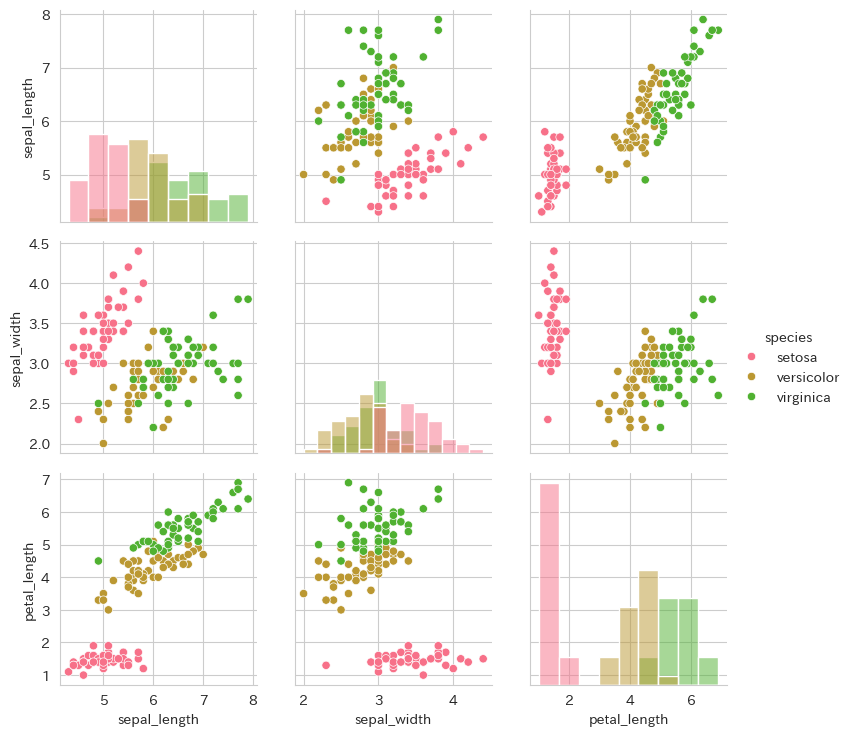

In [12]:
# 特定の変数のみを使用
g = sns.PairGrid(iris, vars=['sepal_length', 'sepal_width', 'petal_length'],
                 hue='species', height=2.5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

### 2.2 JointGrid

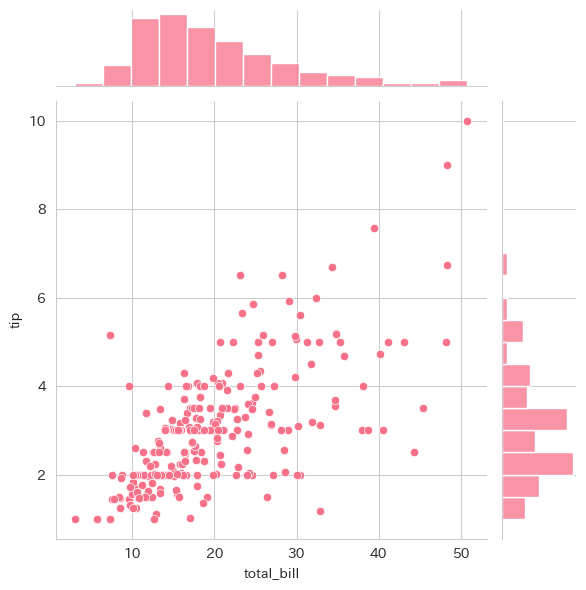

In [13]:
# 基本的な JointGrid
g = sns.JointGrid(data=tips, x='total_bill', y='tip')
g.plot(sns.scatterplot, sns.histplot)
plt.show()

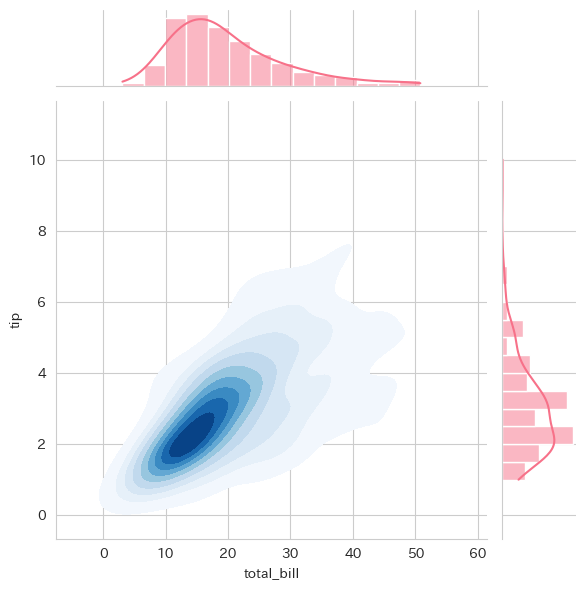

In [14]:
# 異なるプロットの組み合わせ
g = sns.JointGrid(data=tips, x='total_bill', y='tip')
g.plot_joint(sns.kdeplot, fill=True, cmap='Blues')
g.plot_marginals(sns.histplot, kde=True)
plt.show()

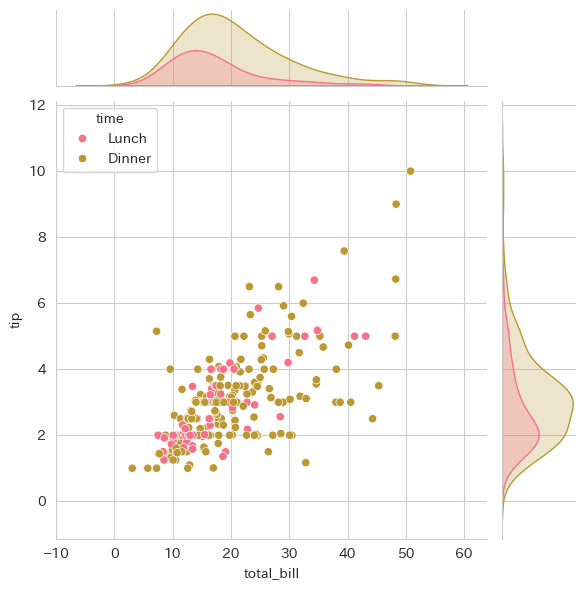

In [15]:
# hue を使用
g = sns.JointGrid(data=tips, x='total_bill', y='tip', hue='time')
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.kdeplot, fill=True)
plt.show()

---
## 3. ClusterMap（階層的クラスタリング）

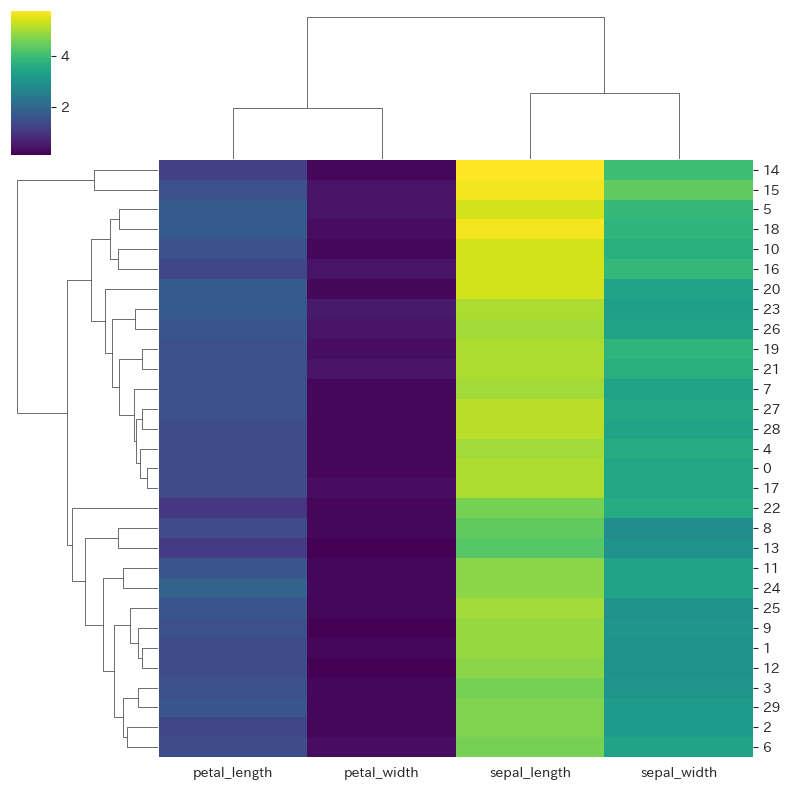

In [16]:
# iris データの数値列のみを使用
iris_numeric = iris.drop('species', axis=1)

# 基本的なクラスターマップ
g = sns.clustermap(iris_numeric.head(30), cmap='viridis', 
                   figsize=(8, 8))
plt.show()

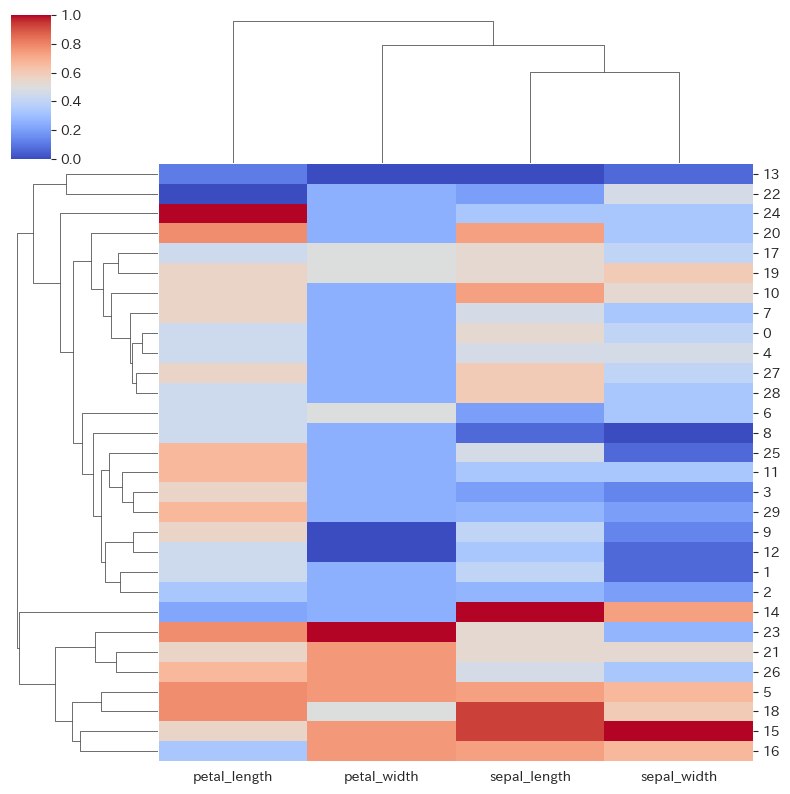

In [17]:
# 標準化してからクラスタリング
g = sns.clustermap(iris_numeric.head(30), cmap='coolwarm', 
                   standard_scale=1,  # 列方向に標準化
                   figsize=(8, 8))
plt.show()

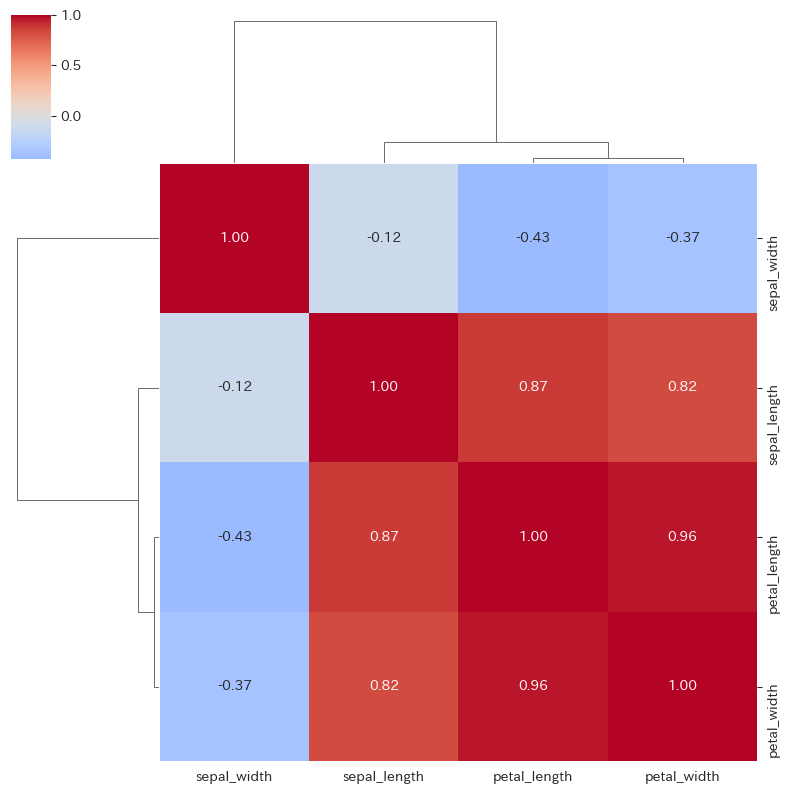

In [18]:
# 相関行列のクラスターマップ
corr = iris_numeric.corr()
g = sns.clustermap(corr, cmap='coolwarm', center=0,
                   annot=True, fmt='.2f',
                   figsize=(8, 8))
plt.show()

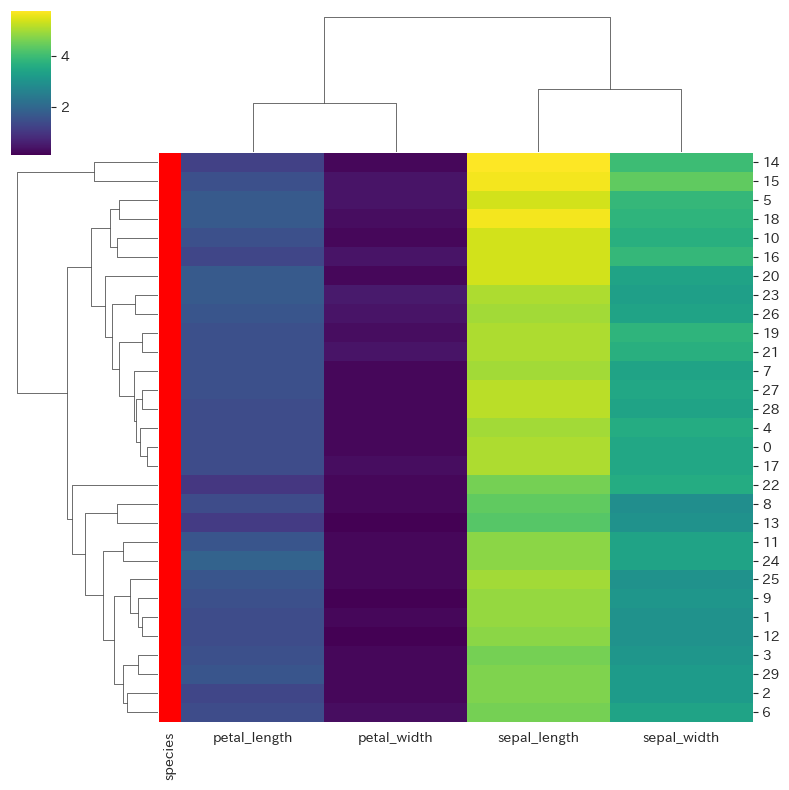

In [19]:
# 行のカラーラベル
# species をカラーコードに変換
species_colors = iris['species'].head(30).map({
    'setosa': 'red',
    'versicolor': 'green',
    'virginica': 'blue'
})

g = sns.clustermap(iris_numeric.head(30), cmap='viridis',
                   row_colors=species_colors,
                   figsize=(8, 8))
plt.show()

---
## 4. 統計的推定の可視化

### 4.1 信頼区間の表示

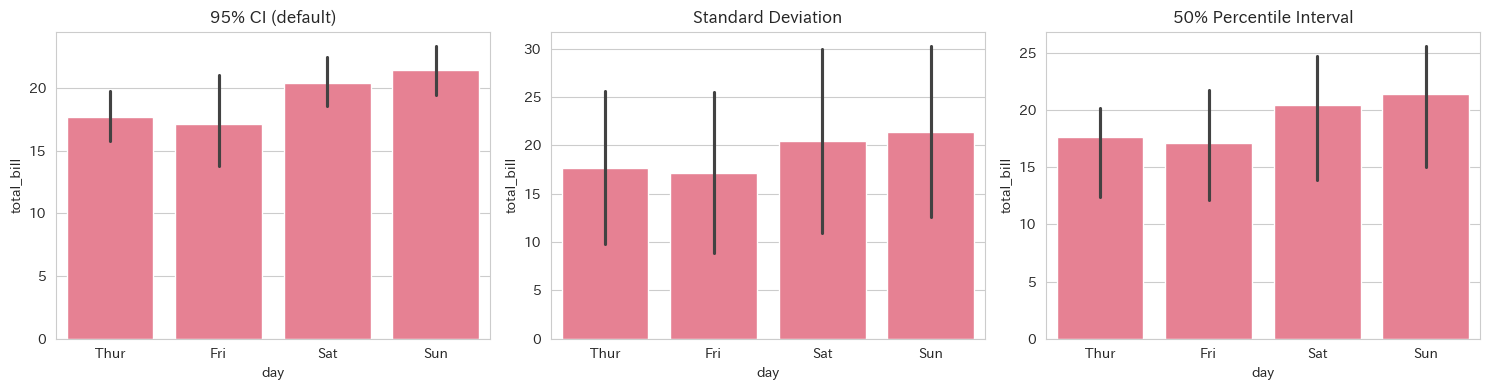

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# デフォルト（95%信頼区間）
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('95% CI (default)')

# 標準偏差
sns.barplot(data=tips, x='day', y='total_bill', errorbar='sd', ax=axes[1])
axes[1].set_title('Standard Deviation')

# パーセンタイル
sns.barplot(data=tips, x='day', y='total_bill', errorbar=('pi', 50), ax=axes[2])
axes[2].set_title('50% Percentile Interval')

plt.tight_layout()
plt.show()

### 4.2 ブートストラップ

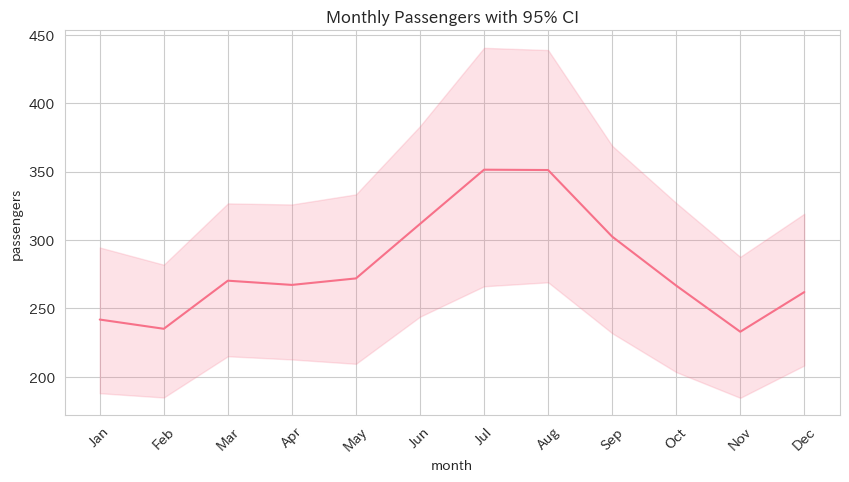

In [21]:
# lineplot でのブートストラップ信頼区間
# フライトデータの月ごとの乗客数
plt.figure(figsize=(10, 5))
sns.lineplot(data=flights, x='month', y='passengers', 
             errorbar=('ci', 95))  # 95%信頼区間
plt.title('Monthly Passengers with 95% CI')
plt.xticks(rotation=45)
plt.show()

### 4.3 pointplot

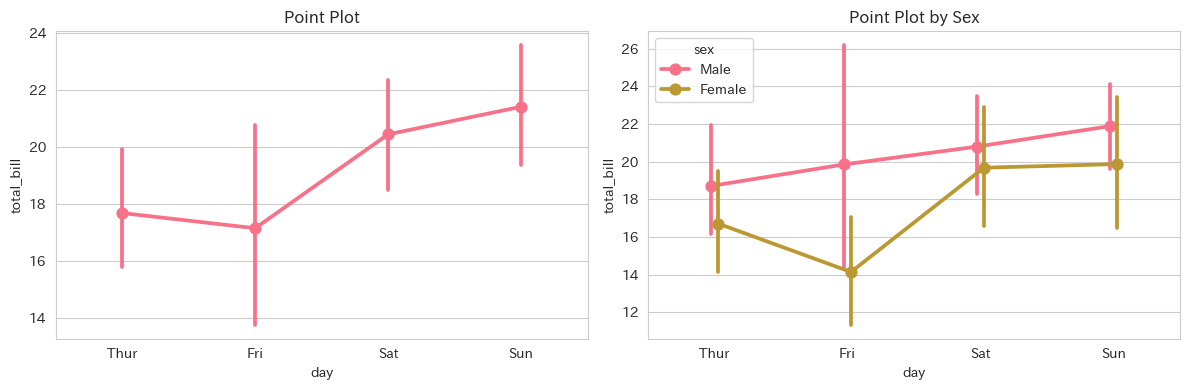

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 基本的なポイントプロット
sns.pointplot(data=tips, x='day', y='total_bill', ax=axes[0])
axes[0].set_title('Point Plot')

# hue による分割
sns.pointplot(data=tips, x='day', y='total_bill', hue='sex',
              dodge=True, ax=axes[1])
axes[1].set_title('Point Plot by Sex')

plt.tight_layout()
plt.show()

---
## 5. 時系列データの可視化

In [23]:
# flights データをピボット
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
print(flights_pivot.head())

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472


### 5.1 ヒートマップ

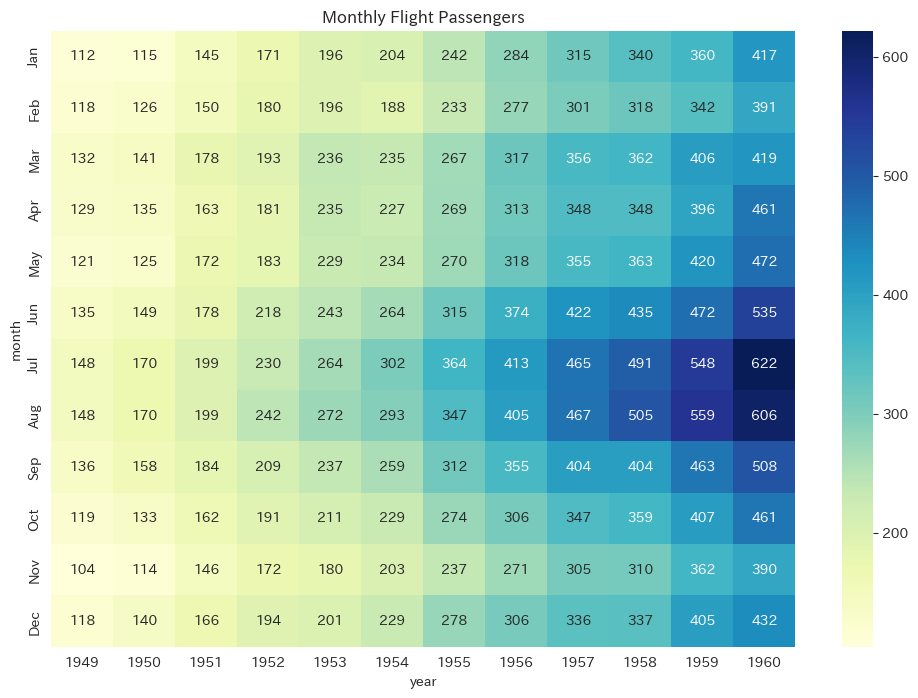

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(flights_pivot, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Monthly Flight Passengers')
plt.show()

### 5.2 複数の時系列

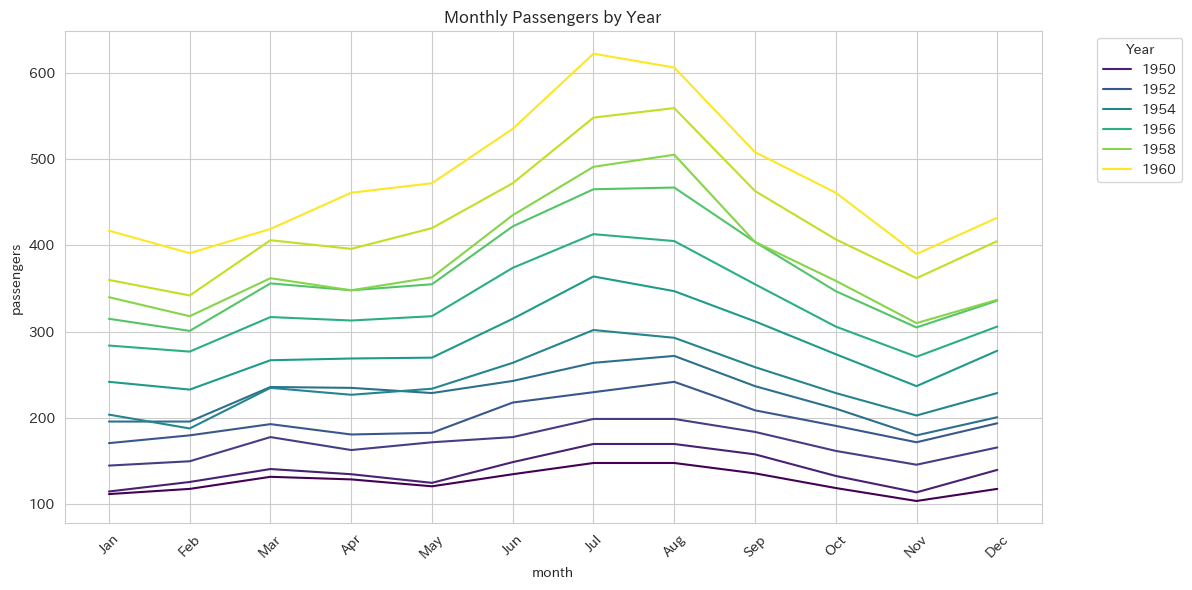

In [25]:
# 年ごとの時系列
plt.figure(figsize=(12, 6))
sns.lineplot(data=flights, x='month', y='passengers', hue='year',
             palette='viridis')
plt.title('Monthly Passengers by Year')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5.3 季節性の可視化

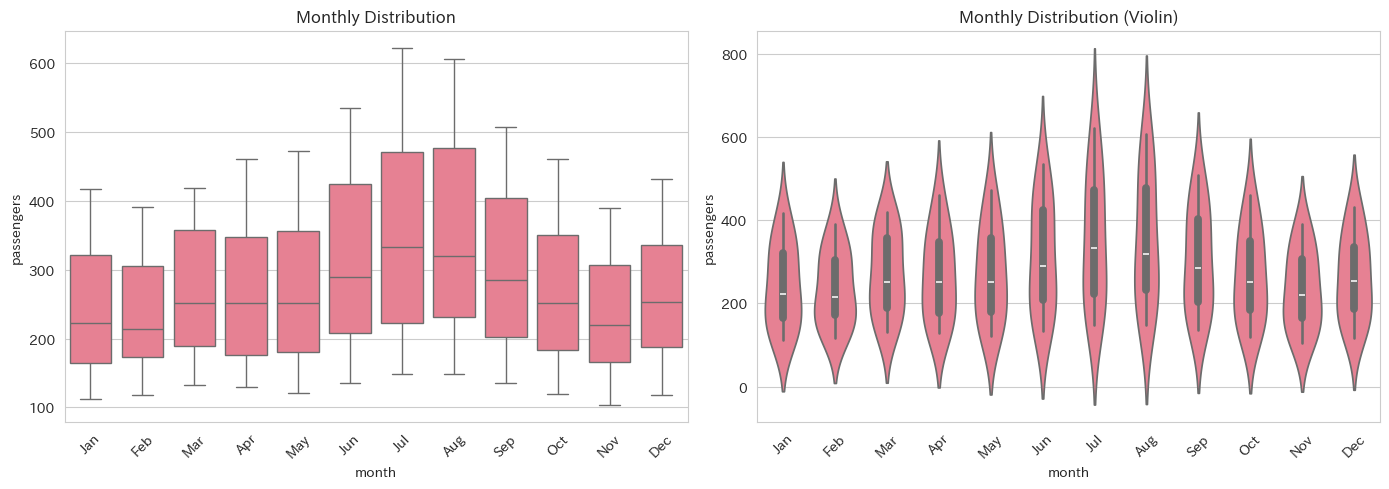

In [26]:
# 月ごとの分布
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=flights, x='month', y='passengers', ax=axes[0])
axes[0].set_title('Monthly Distribution')
axes[0].tick_params(axis='x', rotation=45)

sns.violinplot(data=flights, x='month', y='passengers', ax=axes[1])
axes[1].set_title('Monthly Distribution (Violin)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

---
## 6. 高度なカスタマイズ

### 6.1 objects インターフェース（seaborn 0.12+）

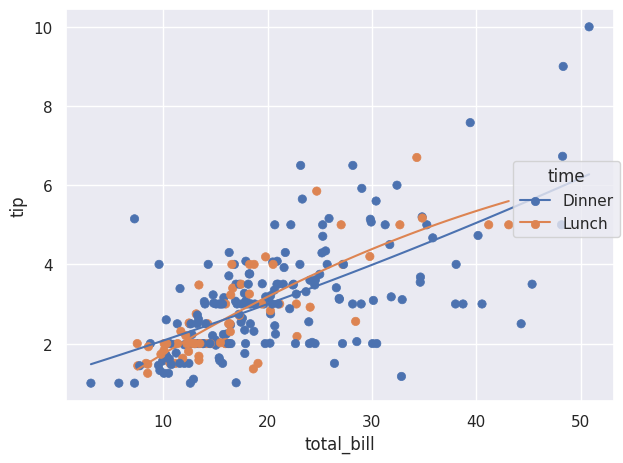

In [27]:
# seaborn.objects が利用可能か確認
try:
    import seaborn.objects as so
    
    # objects インターフェースでのプロット
    (
        so.Plot(tips, x='total_bill', y='tip', color='time')
        .add(so.Dot())
        .add(so.Line(), so.PolyFit())
        .show()
    )
except ImportError:
    print('seaborn.objects は seaborn 0.12+ で利用可能です')
except Exception as e:
    print(f'エラー: {e}')

### 6.2 カスタムカラーマップ

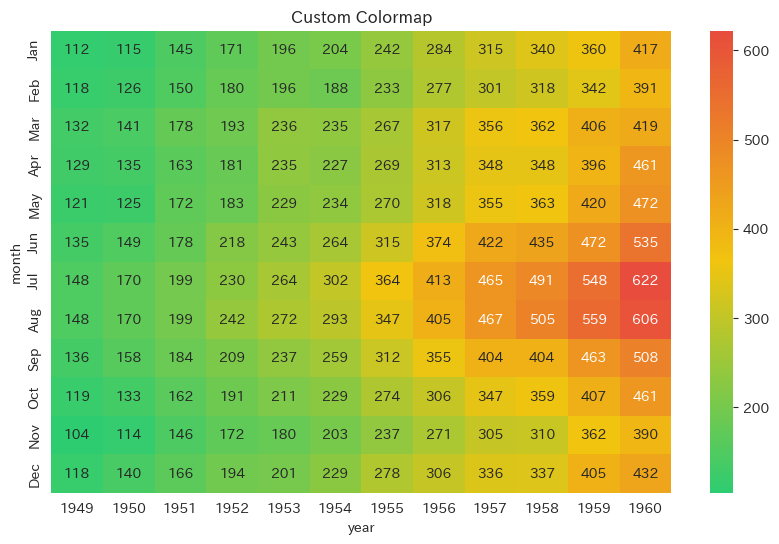

In [28]:
from matplotlib.colors import LinearSegmentedColormap

# カスタムカラーマップの作成
colors = ['#2ecc71', '#f1c40f', '#e74c3c']  # 緑 → 黄 → 赤
custom_cmap = LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(10, 6))
sns.heatmap(flights_pivot, cmap=custom_cmap, annot=True, fmt='d')
plt.title('Custom Colormap')
plt.show()

### 6.3 複合プロット

/tmp/ipykernel_2704/375473110.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = tips.groupby('day')['total_bill'].mean()


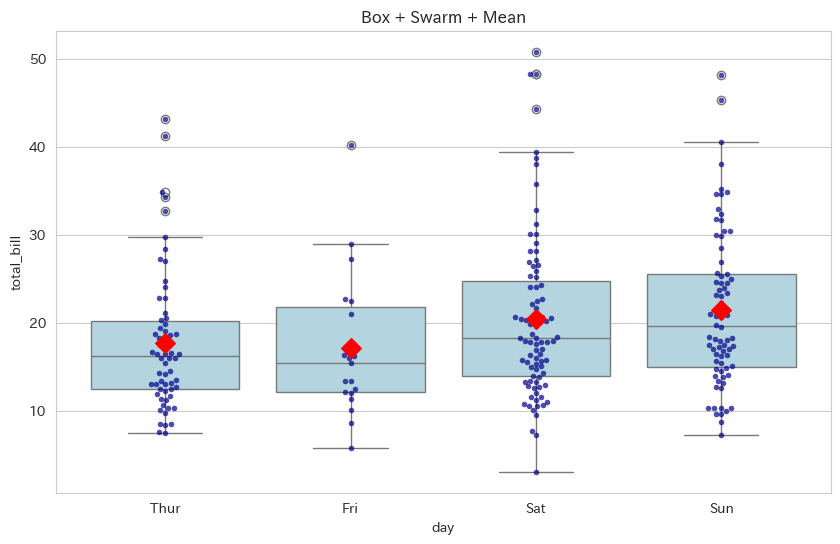

In [29]:
# 複数の種類のプロットを重ねる
fig, ax = plt.subplots(figsize=(10, 6))

# 箱ひげ図
sns.boxplot(data=tips, x='day', y='total_bill', 
            color='lightblue', ax=ax)

# スウォームプロット（個々のデータ点）
sns.swarmplot(data=tips, x='day', y='total_bill', 
              color='darkblue', size=4, alpha=0.7, ax=ax)

# 平均値のマーカー
means = tips.groupby('day')['total_bill'].mean()
for i, (day, mean) in enumerate(means.items()):
    ax.scatter(i, mean, color='red', s=100, zorder=10, marker='D')

ax.set_title('Box + Swarm + Mean')
plt.show()

### 6.4 注釈の追加

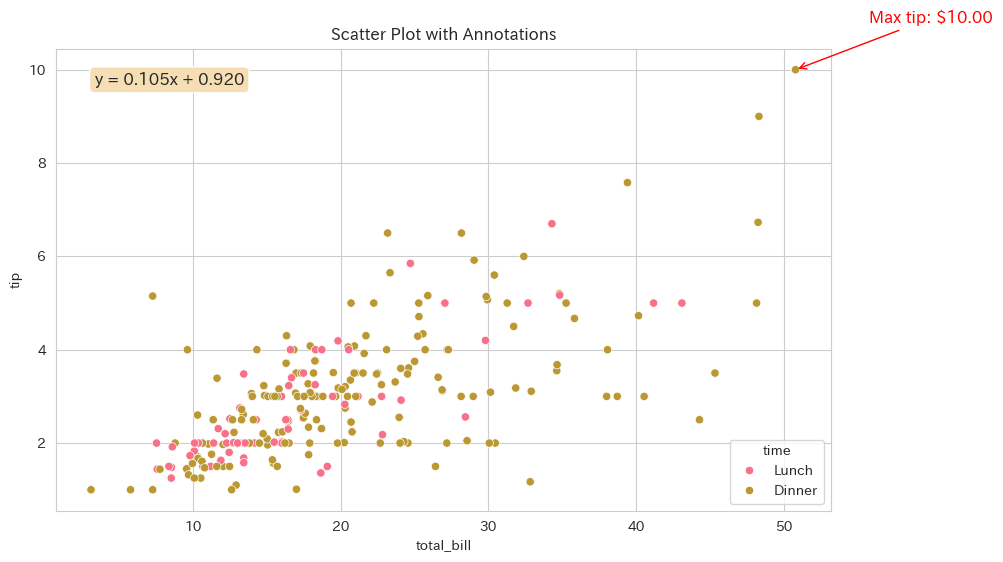

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax)

# 最大のチップを注釈
max_tip_idx = tips['tip'].idxmax()
max_tip_row = tips.loc[max_tip_idx]

ax.annotate(f'Max tip: ${max_tip_row["tip"]:.2f}',
            xy=(max_tip_row['total_bill'], max_tip_row['tip']),
            xytext=(max_tip_row['total_bill'] + 5, max_tip_row['tip'] + 1),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=12, color='red')

# 回帰線の方程式
slope, intercept = np.polyfit(tips['total_bill'], tips['tip'], 1)
ax.text(0.05, 0.95, f'y = {slope:.3f}x + {intercept:.3f}',
        transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.title('Scatter Plot with Annotations')
plt.show()

---
## 7. matplotlib との連携

### 7.1 subplot との組み合わせ

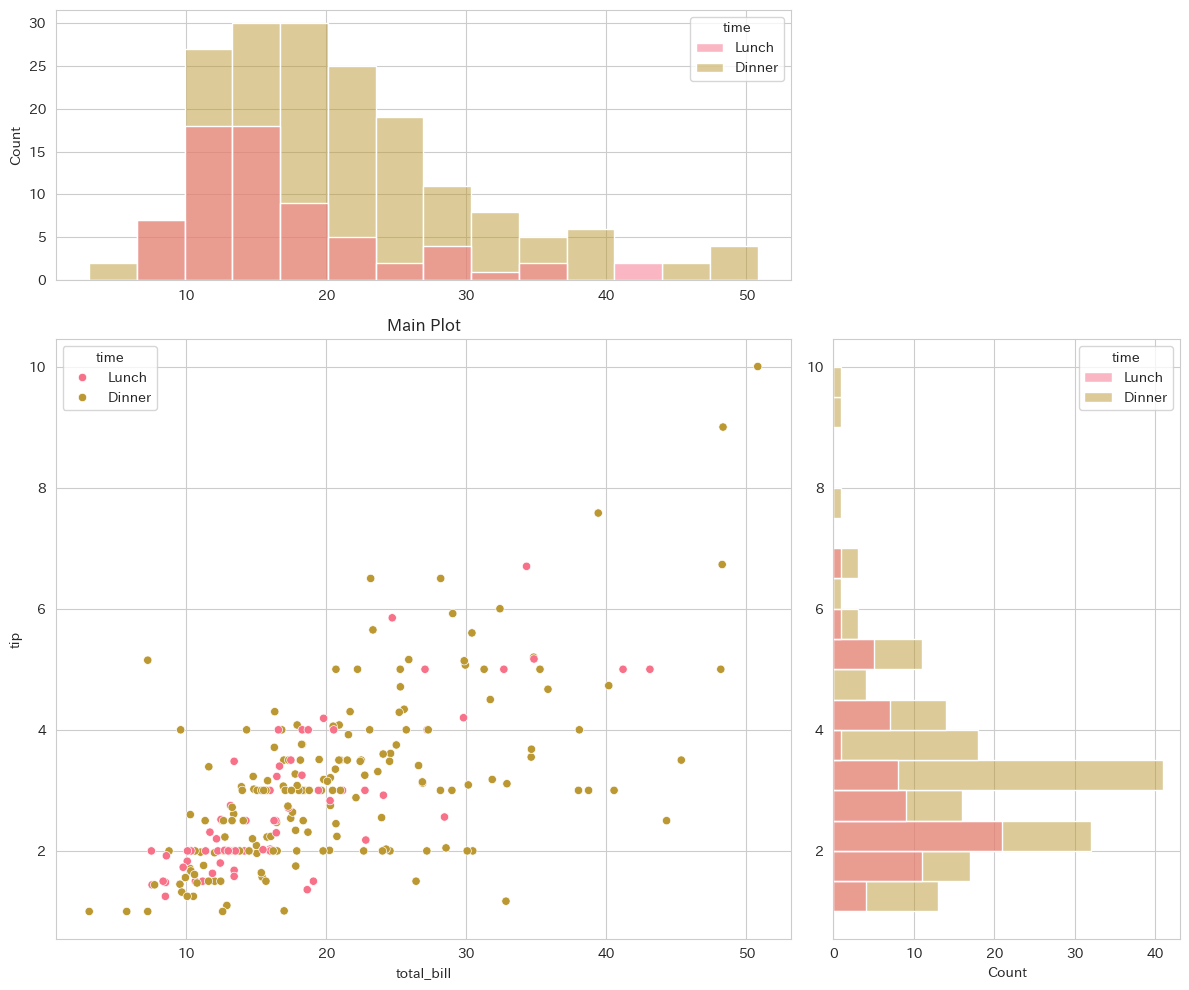

In [31]:
# GridSpec を使った複雑なレイアウト
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12, 10))
gs = GridSpec(3, 3, figure=fig)

# メインの散布図（大きなパネル）
ax_main = fig.add_subplot(gs[1:, :2])
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', ax=ax_main)
ax_main.set_title('Main Plot')

# 上部のヒストグラム
ax_top = fig.add_subplot(gs[0, :2])
sns.histplot(data=tips, x='total_bill', hue='time', ax=ax_top)
ax_top.set_xlabel('')

# 右側のヒストグラム
ax_right = fig.add_subplot(gs[1:, 2])
sns.histplot(data=tips, y='tip', hue='time', ax=ax_right)
ax_right.set_ylabel('')

plt.tight_layout()
plt.show()

### 7.2 ダッシュボード風レイアウト

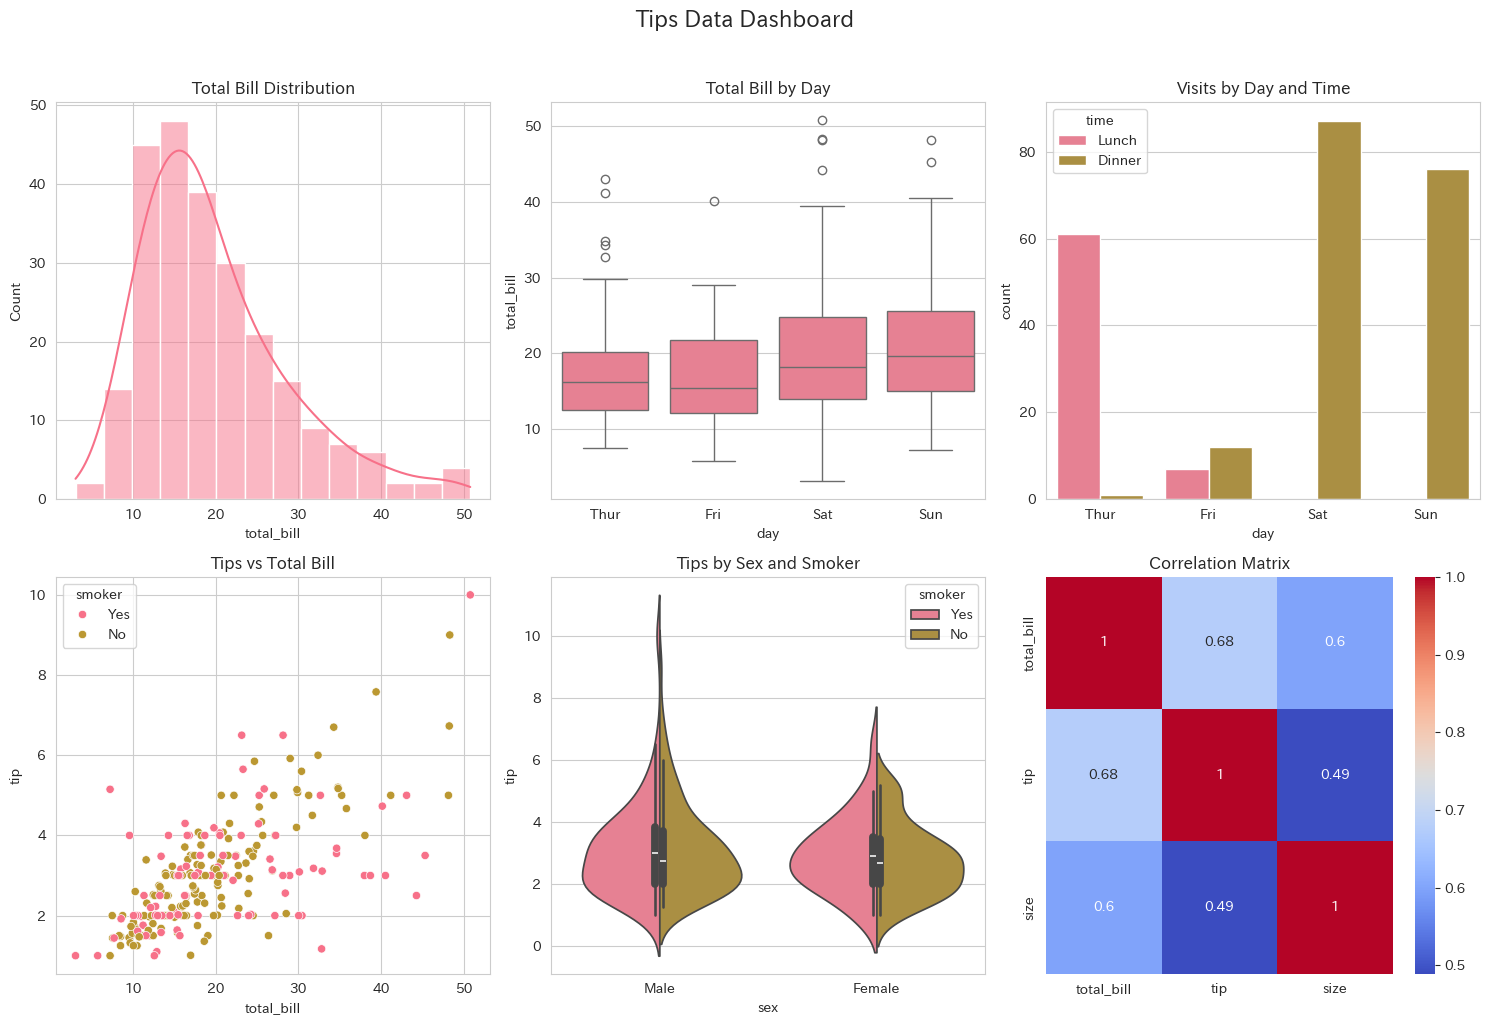

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1行目
sns.histplot(data=tips, x='total_bill', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Total Bill Distribution')

sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0, 1])
axes[0, 1].set_title('Total Bill by Day')

sns.countplot(data=tips, x='day', hue='time', ax=axes[0, 2])
axes[0, 2].set_title('Visits by Day and Time')

# 2行目
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker', ax=axes[1, 0])
axes[1, 0].set_title('Tips vs Total Bill')

sns.violinplot(data=tips, x='sex', y='tip', hue='smoker', split=True, ax=axes[1, 1])
axes[1, 1].set_title('Tips by Sex and Smoker')

# 相関ヒートマップ
numeric_tips = tips.select_dtypes(include=[np.number])
sns.heatmap(numeric_tips.corr(), annot=True, cmap='coolwarm', ax=axes[1, 2])
axes[1, 2].set_title('Correlation Matrix')

plt.suptitle('Tips Data Dashboard', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

### 7.3 スタイルの一時的な変更

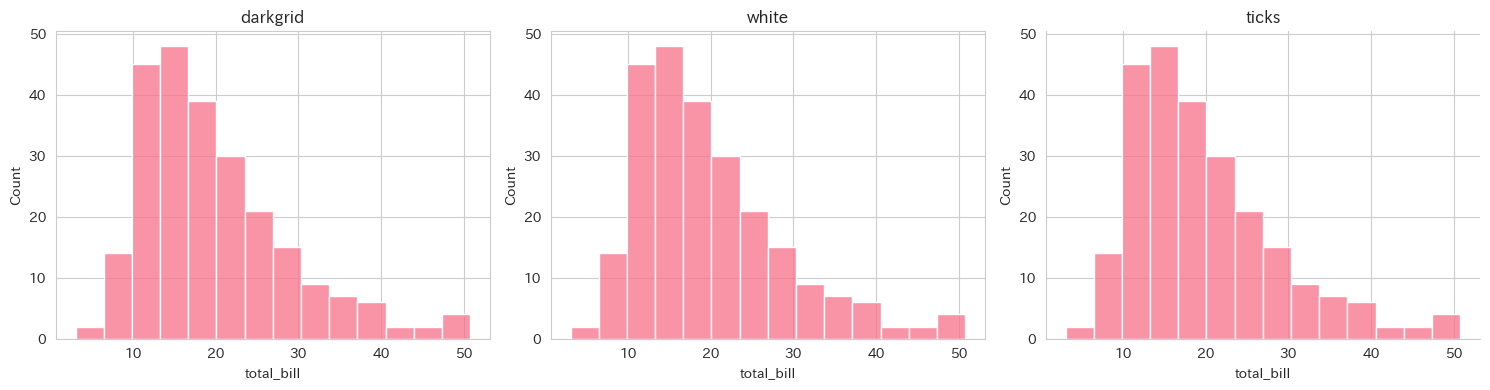

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 異なるスタイルを適用
with sns.axes_style('darkgrid'):
    sns.histplot(tips['total_bill'], ax=axes[0])
    axes[0].set_title('darkgrid')

with sns.axes_style('white'):
    sns.histplot(tips['total_bill'], ax=axes[1])
    axes[1].set_title('white')

with sns.axes_style('ticks'):
    sns.histplot(tips['total_bill'], ax=axes[2])
    axes[2].set_title('ticks')
    sns.despine(ax=axes[2])  # スパインを削除

plt.tight_layout()
plt.show()

### 📝 7章 練習問題

1. titanic データを使って、クラス（class）と生存（survived）の関係を示す複合プロットを作成してください
2. FacetGrid を使って、性別ごとに年齢（age）の分布を表示してください

In [34]:
# 練習問題の解答欄



---
## まとめ

このチュートリアルで学んだことをまとめます：

| カテゴリ | 主な機能 | 用途 |
|---------|---------|------|
| FacetGrid | `FacetGrid`, `map()`, `map_dataframe()` | データサブセットごとのパネル |
| Grid系 | `PairGrid`, `JointGrid` | 多変量の関係性 |
| クラスタリング | `clustermap()` | 階層的クラスタリング可視化 |
| 統計推定 | `errorbar`, `pointplot()` | 信頼区間・推定値の表示 |
| 時系列 | `lineplot()`, `heatmap()` | 時系列パターンの可視化 |
| カスタマイズ | `axes_style()`, カスタムカラーマップ | 見た目の詳細調整 |

## 次のステップ

seaborn の中級を終えたら、以下も学んでみましょう：
- matplotlib の詳細なカスタマイズ
- plotly によるインタラクティブな可視化
- 実践的なデータ分析プロジェクト